# American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the hands combined with facial expressions and postures of the body. It is the primary language of many North Americans who are deaf and is one of several communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabets are shown below. This excercise focuses on classifying a subset of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand showing one of the letters A-I, we want to detect which letter is being represented.

![](https://drive.google.com/uc?export=view&id=1C8r-cwHSbpK2bD4n-00XzKhwuPN1ZOQv)

## Data Loading
The data for this excercise is present in "[asl_data.zip](https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0)". The dataset contains 9 classes (images corresponding to characters A to I). For convenience, the dataset is structured in such a way that we can use TorchVision's ImageFolder dataset [(documentation)](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) rather than writing your own custom dataset loader.

In [ ]:
# Define the standard imports
from __future__ import print_function 
from __future__ import division

import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
%matplotlib inline

import time
import os
import copy

In [ ]:
# Download the data in the current working directory
!rm -rf asl_data.zip asl_data
!wget -O asl_data.zip https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0
!unzip asl_data.zip
!rm asl_data.zip

# Top level data directory. Here we assume the format of the directory conforms 
#   to the ImageFolder structure
data_dir = "./asl_data"

# Define the class label
class_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I'}

--2020-11-15 12:20:23--  https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r75maq5e1vyda4g/asl_data.zip [following]
--2020-11-15 12:20:23--  https://www.dropbox.com/s/raw/r75maq5e1vyda4g/asl_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc730a095606ddc06d26b5fc58fc.dl.dropboxusercontent.com/cd/0/inline/BDNa1j6lFQgsvlfIrJOSkb872mnDnuPxqzF_GXyqaJeWGko0nOU6vIiWBmPv70fYcwZG6koViNFE3jGD3vyBRpSjj1bZIJdymqfymfKnjor9YLIAUhqF6CCfusk00OYG0lA/file# [following]
--2020-11-15 12:20:24--  https://uc730a095606ddc06d26b5fc58fc.dl.dropboxusercontent.com/cd/0/inline/BDNa1j6lFQgsvlfIrJOSkb872mnDnuPxqzF_GXyqaJeWGko0nOU6vIiWBmPv70fYcwZG6koViNFE3jGD3vyBRpSjj1bZIJdymqfymfKnjo

## Visualize the data

We will now see how the sample data looks like

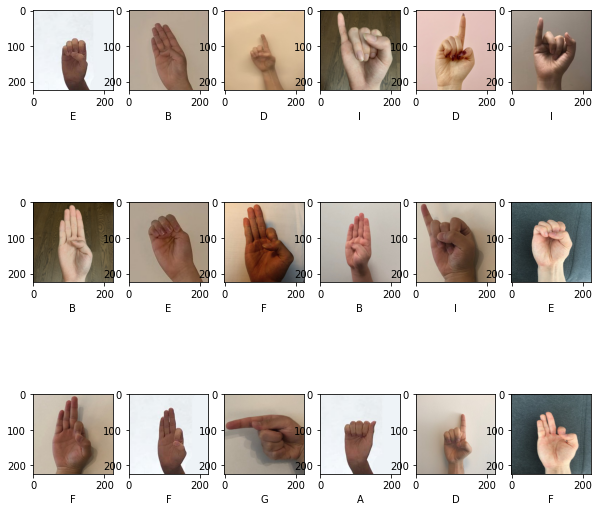

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=transforms.ToTensor()) for x in ['train', 'val']}
val_dataloader = torch.utils.data.DataLoader(image_datasets['val'], batch_size=1, shuffle=True)


f = plt.figure(figsize=(10, 10))
for i in range(18):
    img, label = next(iter(val_dataloader))
    img = img.squeeze().permute(1,2,0).numpy()

    plt.subplot(3,6,i+1)
    plt.imshow(img)
    plt.xlabel(class_dict[label.numpy()[0]])
    
    

# Excercise: Neural Network

In this excercise you will be using a neural network. You are free to use one of the pretrained model, as demonstrated in the previous lab, or write your own neural network from scratch.

You may use the PyTorch documentation, previous excercises and notebooks freely. You might find documentations and notebooks discussed in the last two classes helpful. However, all code and analysis that you submit must be your own.


### **Questions**
**Question 1: Model Building**

Build a multi-layered perceptron (MLP) in Pytorch that inputs  that takes the (224x224 RGB) image as input, and predicts the letter (You may need to flatten the image vector first). Your model should be a subclass of `nn.Module`. Explain your choice of neural network architecture: how many layers your network has? What types of layers does it contain? What about other decisions like use of dropout layers, activation functions, number of channels / hidden units.

**Question 2: Training Code** 

Write code to train your neural network given some training data. Your training code should make it easy to tweak hyperparameters. Make sure that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice of loss function. Ensure that your code runs on GPU.


**Question 3: Overfit to a Small Dataset** 

**Part (a)**: One way to sanity check our neural network model and training code is to check whether the model is capable of overfitting a small dataset. Construct a small dataset (e.g. 1-2 image per class). Then show that your model and training code is capable of overfitting on that small dataset. You should be able to obtain a 100% training accuracy on that small dataset relatively quickly.

If your model cannot overfit the small dataset quickly, then there is a bug in either your model code and/or your training code. Fix the issues before you proceed to the next step.

**Part (b)**: Once you are done with the above part, try to reduce the effect of overfitting by using techniques discussed in the previous lecture.

**Question 4: Finetuning** 

For many image classification tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to the enormous compute requirements and lack of sufficient amounts of training data.

In this part, you will use Transfer Learning to extract features from the hand gesture images. Then, train last few classification layers to use these features as input and classify the hand gestures. As you have learned in the previous lecture, you can use AlexNet architecture that is pretrained on 1000-class ImageNet dataset and finetune it for the task of understanding American sign language.

**Question 5: Report result** 

Train your new network, including any hyperparameter tuning. Plot and submit the training and validation loss and accuracy of your best model only. Along with it, also submit the final validation accuracy achieved by your model.


In [ ]:
### Write your code here ###